Создание RNN. LSTM.

In [8]:
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import preprocessing as tfkp
from keras import layers as l
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def show_res():
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Точность тренировки')
    plt.plot(epochs, val_acc, 'b', label='Точность проверки')
    plt.title('Точность тренировки и проверки')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'ro', label='Потери тренировки')
    plt.plot(epochs, val_loss, 'r', label='Потери проверки')
    plt.title('Потери тренировки и проверки')
    plt.legend()

    plt.show()

Реализация RNN при помощи NumPy

In [10]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    
    successive_outputs.append(output_t)
    
    state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis=0)

Изучение SimpleRNN

In [11]:
model = tfk.models.Sequential([
    l.Embedding(10000, 32),
    l.SimpleRNN(32)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [12]:
model = tfk.models.Sequential([
    l.Embedding(10000, 32),
    l.SimpleRNN(32, return_sequences=True)
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [13]:
model = tfk.models.Sequential([
    l.Embedding(10000, 32),
    l.SimpleRNN(32, return_sequences=True),
    l.SimpleRNN(32, return_sequences=True),
    l.SimpleRNN(32, return_sequences=True),
    l.SimpleRNN(32)
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [15]:
from tensorflow.keras.datasets import imdb

max_features = 10000
maxlen = 500
batch_size = 32

print('Загрузка данных...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'тренировочных последовательностей')
print(len(input_test), 'тестовых последовательностей')

print('Pad-последовательности (примеры х время)')
input_train = tfkp.sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = tfkp.sequence.pad_sequences(input_test, maxlen=maxlen)
print('Форма input_train:', input_train.shape)
print('Форма input_test:', input_test.shape)

Загрузка данных...
25000 тренировочных последовательностей
25000 тестовых последовательностей
Pad-последовательности (примеры х время)
Форма input_train: (25000, 500)
Форма input_test: (25000, 500)


Epoch 1/10
157/157 [==============================] - 66s 400ms/step - loss: 0.6416 - acc: 0.6242 - val_loss: 0.5384 - val_acc: 0.7714
Epoch 2/10
157/157 [==============================] - 61s 391ms/step - loss: 0.4123 - acc: 0.8298 - val_loss: 0.4160 - val_acc: 0.8184
Epoch 3/10
157/157 [==============================] - 63s 400ms/step - loss: 0.2907 - acc: 0.8845 - val_loss: 0.3471 - val_acc: 0.8560
Epoch 4/10
157/157 [==============================] - 66s 423ms/step - loss: 0.2033 - acc: 0.9243 - val_loss: 0.4230 - val_acc: 0.8342
Epoch 5/10
157/157 [==============================] - 71s 450ms/step - loss: 0.1368 - acc: 0.9524 - val_loss: 0.4012 - val_acc: 0.8576
Epoch 6/10
157/157 [==============================] - 101s 648ms/step - loss: 0.0833 - acc: 0.9733 - val_loss: 0.4230 - val_acc: 0.8518
Epoch 7/10
157/157 [==============================] - 80s 513ms/step - loss: 0.0552 - acc: 0.9830 - val_loss: 0.6396 - val_acc: 0.7596
Epoch 8/10
157/157 [==============================] - 

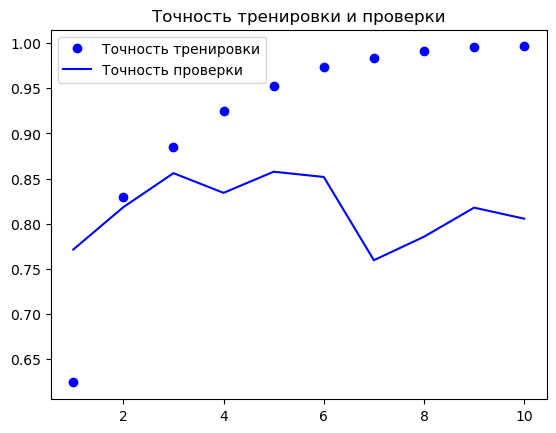

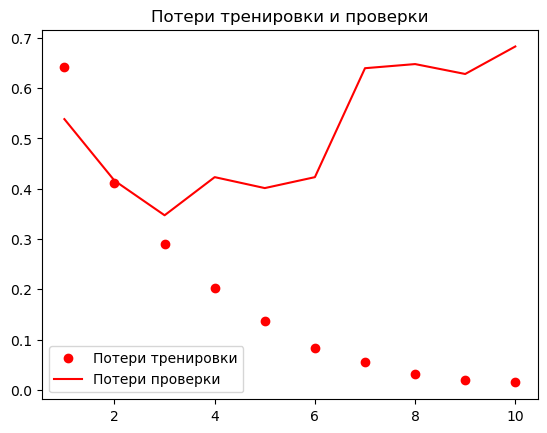

In [17]:
model = tfk.models.Sequential([
    l.Embedding(max_features, 32),
    l.SimpleRNN(32),
    l.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['acc'])

# history = model.fit(input_train,
#                     y_train,
#                     epochs=10,
#                     batch_size=128,
#                     validation_split=0.2)
# show_res()

Изучение LSTM.

Epoch 1/10
157/157 [==============================] - 176s 1s/step - loss: 0.4861 - acc: 0.7732 - val_loss: 0.3978 - val_acc: 0.8364
Epoch 2/10
157/157 [==============================] - 157s 1s/step - loss: 0.2871 - acc: 0.8913 - val_loss: 0.2963 - val_acc: 0.8862
Epoch 3/10
157/157 [==============================] - 145s 927ms/step - loss: 0.2340 - acc: 0.9128 - val_loss: 0.9697 - val_acc: 0.7362
Epoch 4/10
157/157 [==============================] - 141s 900ms/step - loss: 0.1998 - acc: 0.9277 - val_loss: 0.3925 - val_acc: 0.8318
Epoch 5/10
157/157 [==============================] - 144s 919ms/step - loss: 0.1784 - acc: 0.9364 - val_loss: 0.7052 - val_acc: 0.7736
Epoch 6/10
157/157 [==============================] - 147s 938ms/step - loss: 0.1573 - acc: 0.9441 - val_loss: 0.3509 - val_acc: 0.8692
Epoch 7/10
157/157 [==============================] - 145s 923ms/step - loss: 0.1459 - acc: 0.9495 - val_loss: 0.3772 - val_acc: 0.8718
Epoch 8/10
157/157 [==============================] - 

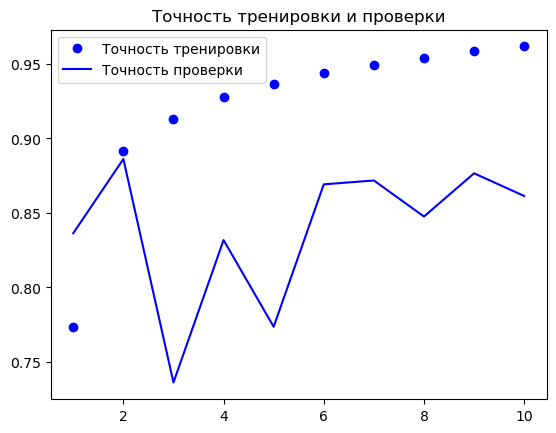

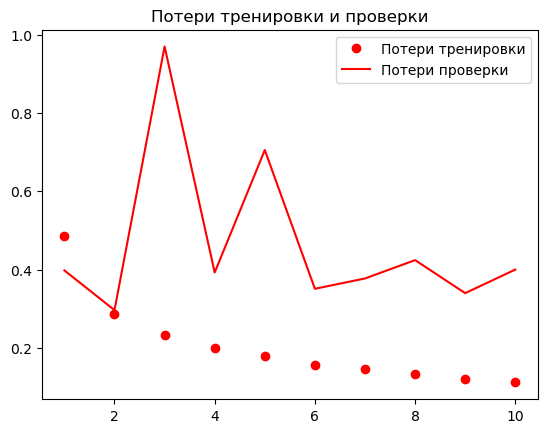

In [18]:
model = tfk.models.Sequential([
    l.Embedding(max_features, 32),
    l.LSTM(32),
    l.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)
show_res()